<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/06_Multiclass_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

#ROOT = "/content/drive/MyDrive/Tensorflow"

#os.chdir(ROOT)
#os.getcwd()

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Import the Data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-10-23 08:52:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.192.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   180MB/s    in 2.8s    

2021-10-23 08:52:15 (180 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
# Unzip the downladed file

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [6]:
#setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [7]:
#Class names
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
# view random image
#Visualize images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape : {img.shape}")

  return img

['196228.jpg']
image shape : (384, 512, 3)


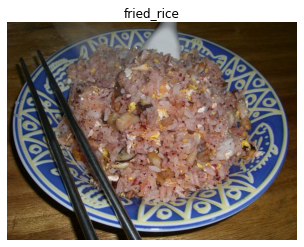

In [9]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [10]:
#

### 2. Preprocess the Data

In [11]:
# create train and test data generation and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

In [12]:
# Load images and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [14]:
images[7].shape

(224, 224, 3)

In [15]:
#view the first batch of labels
labels

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 

### 3. Creating the Model

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [17]:
# Build a CNN model
model_1 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3)),
                      Activation(activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 85s 232ms/step - loss: 2.2153 - accuracy: 0.1775 - val_loss: 2.0408 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 55s 236ms/step - loss: 1.9306 - accuracy: 0.3227 - val_loss: 1.8675 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 56s 236ms/step - loss: 1.6089 - accuracy: 0.4629 - val_loss: 1.8147 - val_accuracy: 0.3604
Epoch 4/5
235/235 [==============================] - 56s 236ms/step - loss: 1.0553 - accuracy: 0.6572 - val_loss: 2.2268 - val_accuracy: 0.3032
Epoch 5/5
235/235 [==============================] - 55s 235ms/step - loss: 0.4560 - accuracy: 0.8567 - val_loss: 3.1018 - val_accuracy: 0.2828


In [19]:
### 4. Evaluate the model
model_1.evaluate(valid_data)

79/79 [==============================] - 12s 156ms/step - loss: 3.1018 - accuracy: 0.2828


[3.1018266677856445, 0.28279998898506165]

In [20]:
# Plot the training and Validation curves seperatley

def plot_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

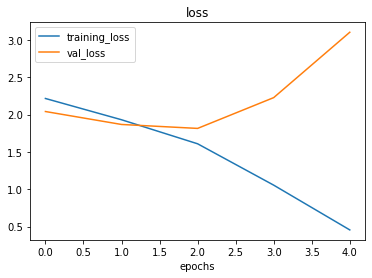

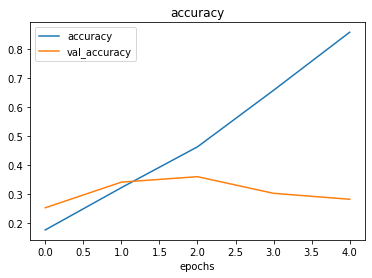

In [21]:
plot_curves(history_1)

### 4. hyperparameter tuning

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [23]:
# Build a CNN model -2
model_2 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation="softmax")
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 51s 213ms/step - loss: 2.2983 - accuracy: 0.1879 - val_loss: 2.0574 - val_accuracy: 0.2484
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.8843 - accuracy: 0.3555 - val_loss: 1.9567 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.5678 - accuracy: 0.4727 - val_loss: 2.0868 - val_accuracy: 0.2868
Epoch 4/5
235/235 [==============================] - 49s 207ms/step - loss: 1.1920 - accuracy: 0.6067 - val_loss: 2.2665 - val_accuracy: 0.2864
Epoch 5/5
235/235 [==============================] - 49s 211ms/step - loss: 0.8010 - accuracy: 0.7451 - val_loss: 2.6239 - val_accuracy: 0.2768


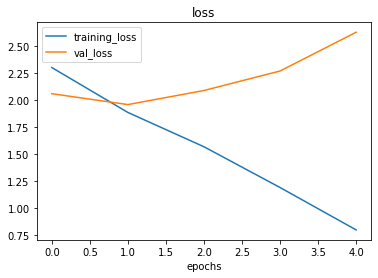

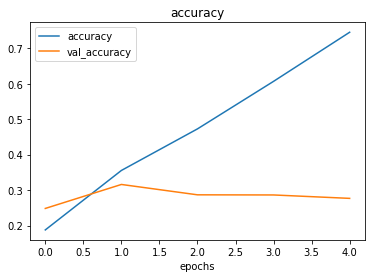

In [24]:
plot_curves(history_2)

In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [29]:
# Data Agumentation

#create ImageDataGenerator training instance with data agumentation
train_datagen_agumented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data agumentation
train_datagen = ImageDataGenerator(rescale=1./255.)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [30]:
# Import data and agument it from training directory and shuffled
train_data_agumented_shuffled = train_datagen_agumented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [31]:
# Build a CNN model - 3
model_3 = tf.keras.models.clone_model(model_2)

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data_agumented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_agumented_shuffled),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 123s 521ms/step - loss: 2.2066 - accuracy: 0.1925 - val_loss: 2.0717 - val_accuracy: 0.2668
Epoch 2/5
235/235 [==============================] - 120s 511ms/step - loss: 2.0972 - accuracy: 0.2517 - val_loss: 1.9354 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 120s 509ms/step - loss: 2.0488 - accuracy: 0.2692 - val_loss: 1.9214 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0131 - accuracy: 0.2925 - val_loss: 1.8735 - val_accuracy: 0.3340
Epoch 5/5
235/235 [==============================] - 120s 510ms/step - loss: 2.0036 - accuracy: 0.3004 - val_loss: 1.8037 - val_accuracy: 0.3860


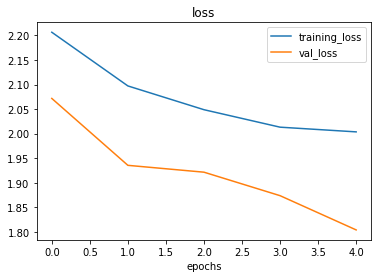

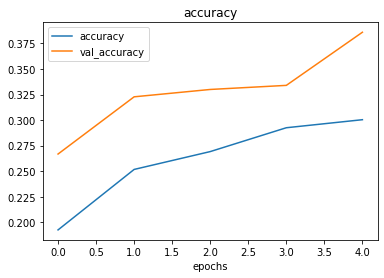

In [32]:
plot_curves(history_3)